# Quantum poker
This program aims to serve as an introduction to how quantum logic gates operate on qubits, and to basic properties of entanglement and superposition.

---

<center><a href="https://colab.research.google.com/github/sintefmath/QuantumPoker/blob/master/Python/runInteractivePokerJN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></center>



In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  from google.colab import output
  output.enable_custom_widget_manager()
  !pip install qiskit
  !pip install ipympl
  !rm -rf /content/QuantumPoker/
  !git clone https://github.com/sintefmath/QuantumPoker
  sys.path.append('/content/QuantumPoker/Python')
  sys.path.append('/content/QuantumPoker')
  get_ipython().magic('matplotlib ipympl')
else:
  get_ipython().magic('matplotlib notebook')

## Intro
In this quantum version of poker, the players are initially dealt three quantum gates that can be applied to qubits at the end of every game. Each player has their own set of qubits, but all the sets start in the same initial state. The goal is to measure as many $1$’s as possible after applying your gates to the qubits. Therefore, any player who has not folded by the end of a game should apply their gates in such a way that each qubit has a high probability of being in the state $\vert 1\rangle$.

## Playing the game
First we need to import the required functions and set up the starting conditions for the game.

In [1]:
from os.path import dirname, abspath
import sys
sys.path.append(dirname(abspath('')))
from PokerGame import PokerGame
import matplotlib.pyplot as plt
from numpy import array, count_nonzero

dealer = 0
nPlayers = 3
gameHasRun = False
deckOfGates = {"H": nPlayers, "X": nPlayers, "ZH": nPlayers, "CX": nPlayers}
money = array([100 for i in range(nPlayers)])
names = ["James", "Lilly", "Harry"]

Then we can create the board. Here you see there are three players, James, Lilly, and Harry. In this round James is small blind and Lilly is big blind, so they have already put money on the table. To the right we can see the gates available in the "deck" that the players have been dealt from. For now there are no qubits on the table, as the first three are shown only after the first round of betting. A player can choose to either check/call or fold by pressing the corresponding button or raise by entering a self-determined amount into the text box and hitting the enter button, during their turn. For a more detailed description, please read a guide on poker rules (Texas hold 'em).

## Running the game
After each round of Poker, rerun the cell below to start a new round)

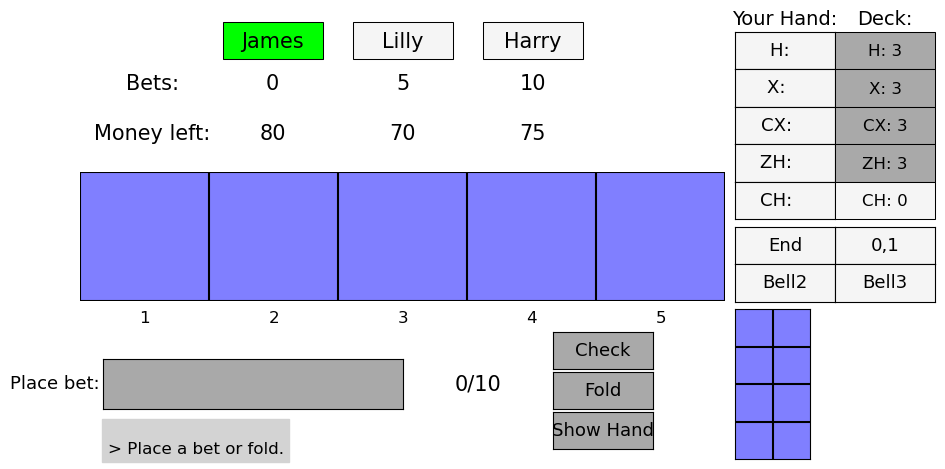

In [6]:
if not count_nonzero(money==0) == (nPlayers-1):
    if gameHasRun:
        dealer = (dealer + 1) % nPlayers
        if 0 in money:
            toDelete=nonzero(money==0)[0]
            for i in flip(toDelete):
                if i < dealer:
                    dealer -= 1
            names = delete(names, nonzero(money==0)[0])
            money = delete(money, nonzero(money==0)[0])
            nPlayers = money.shape[0]
    gameHasRun = True
    pokerGame = PokerGame(deckOfGates, nPlayers, money, names = names, smallBlind=5, smallBlindPlayer=dealer,
                          enableEntanglement=True)